In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, FunctionTransformer, OneHotEncoder, KBinsDiscretizer, MaxAbsScaler, LabelEncoder
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split as split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.mixture import GaussianMixture
from time import time

In [2]:
from sklearn.cluster import KMeans

In [3]:
#load data
df = pd.read_csv('employee-compensation.csv')
df

,Organization Group Code,Job Family Code,Job Code,Year Type,Year,Organization Group,Department Code,Department,Union Code,Union,...,Employee Identifier,Salaries,Overtime,Other Salaries,Total Salary,Retirement,Health and Dental,Other Benefits,Total Benefits,Total Compensation
0,1,1000,1021,Calendar,2013,Public Protection,ADP,ADP Adult Probation,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",...,37730,57534.65,0.0,0.00,57534.65,11253.16,11961.34,4532.63,27747.13,85281.78
1,1,1000,1023,Calendar,2013,Public Protection,ADP,ADP Adult Probation,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",...,26574,57678.50,0.0,0.00,57678.50,10284.88,7176.80,4755.14,22216.82,79895.32
2,1,1000,1031,Calendar,2013,Public Protection,ADP,ADP Adult Probation,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",...,8148,63532.93,0.0,0.00,63532.93,12495.83,12918.24,4702.71,30116.78,93649.71
3,1,1000,1054,Calendar,2013,Public Protection,ADP,ADP Adult Probation,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",...,27436,101274.51,0.0,-7058.59,94215.92,19644.45,12918.24,7458.76,40021.45,134237.37
4,1,1000,1062,Calendar,2013,Public Protection,ADP,ADP Adult Probation,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",...,37730,5084.00,0.0,0.00,5084.00,1083.90,956.91,387.50,2428.31,7512.31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
683272,6,4300,4334,Fiscal,2020,General Administration & Finance,TTX,Treasurer/Tax Collector,790.0,"SEIU, Local 1021, Misc",...,43836214,98444.94,0.0,0.00,98444.94,20540.24,15275.18,8019.49,43834.91,142279.85
683273,6,4300,4334,Fiscal,2020,General Administration & Finance,TTX,Treasurer/Tax Collector,790.0,"SEIU, Local 1021, Misc",...,43966403,9416.71,0.0,0.00,9416.71,1904.43,1468.77,743.51,4116.71,13533.42
683274,6,4300,4334,Fiscal,2020,General Administration & Finance,TTX,Treasurer/Tax Collector,790.0,"SEIU, Local 1021, Misc",...,44016180,96475.00,0.0,576.00,97051.00,20241.56,14100.16,7897.00,42238.72,139289.72
683275,6,4300,4337,Fiscal,2020,General Administration & Finance,TTX,Treasurer/Tax Collector,790.0,"SEIU, Local 1021, Misc",...,42423439,115943.00,0.0,0.00,115943.00,24188.37,15275.18,9018.34,48481.89,164424.89


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683277 entries, 0 to 683276
Data columns (total 22 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Organization Group Code  683277 non-null  int64  
 1   Job Family Code          683277 non-null  object 
 2   Job Code                 683277 non-null  object 
 3   Year Type                683277 non-null  object 
 4   Year                     683277 non-null  int64  
 5   Organization Group       683277 non-null  object 
 6   Department Code          683275 non-null  object 
 7   Department               683275 non-null  object 
 8   Union Code               682926 non-null  float64
 9   Union                    682926 non-null  object 
 10  Job Family               683277 non-null  object 
 11  Job                      683272 non-null  object 
 12  Employee Identifier      683277 non-null  int64  
 13  Salaries                 683277 non-null  float64
 14  Over

In [5]:
df.head()

,Organization Group Code,Job Family Code,Job Code,Year Type,Year,Organization Group,Department Code,Department,Union Code,Union,...,Employee Identifier,Salaries,Overtime,Other Salaries,Total Salary,Retirement,Health and Dental,Other Benefits,Total Benefits,Total Compensation
0,1,1000,1021,Calendar,2013,Public Protection,ADP,ADP Adult Probation,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",...,37730,57534.65,0.0,0.00,57534.65,11253.16,11961.34,4532.63,27747.13,85281.78
1,1,1000,1023,Calendar,2013,Public Protection,ADP,ADP Adult Probation,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",...,26574,57678.50,0.0,0.00,57678.50,10284.88,7176.80,4755.14,22216.82,79895.32
2,1,1000,1031,Calendar,2013,Public Protection,ADP,ADP Adult Probation,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",...,8148,63532.93,0.0,0.00,63532.93,12495.83,12918.24,4702.71,30116.78,93649.71
3,1,1000,1054,Calendar,2013,Public Protection,ADP,ADP Adult Probation,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",...,27436,101274.51,0.0,-7058.59,94215.92,19644.45,12918.24,7458.76,40021.45,134237.37
4,1,1000,1062,Calendar,2013,Public Protection,ADP,ADP Adult Probation,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",...,37730,5084.00,0.0,0.00,5084.00,1083.90,956.91,387.50,2428.31,7512.31


In [6]:
#checking for null values
print(df.isnull().sum())
df[df.Union.isnull() == True].head()

Organization Group Code      0
Job Family Code              0
Job Code                     0
Year Type                    0
Year                         0
Organization Group           0
Department Code              2
Department                   2
Union Code                 351
Union                      351
Job Family                   0
Job                          5
Employee Identifier          0
Salaries                     0
Overtime                     0
Other Salaries               0
Total Salary                 0
Retirement                   0
Health and Dental            0
Other Benefits               0
Total Benefits               0
Total Compensation           0
dtype: int64


,Organization Group Code,Job Family Code,Job Code,Year Type,Year,Organization Group,Department Code,Department,Union Code,Union,...,Employee Identifier,Salaries,Overtime,Other Salaries,Total Salary,Retirement,Health and Dental,Other Benefits,Total Benefits,Total Compensation
144675,2,9100,9152,Calendar,2016,"Public Works, Transportation & Commerce",MTA,MTA Municipal Transprtn Agncy,NaN,NaN,...,10940,25998.0,1732.82,1454.07,29184.89,5008.11,3599.89,2287.72,10895.72,40080.61
144676,2,9100,9152,Calendar,2016,"Public Works, Transportation & Commerce",MTA,MTA Municipal Transprtn Agncy,NaN,NaN,...,12058,76952.7,11617.41,6410.37,94980.48,15046.48,10799.68,7618.56,33464.72,128445.20
144677,2,9100,9152,Calendar,2016,"Public Works, Transportation & Commerce",MTA,MTA Municipal Transprtn Agncy,NaN,NaN,...,16049,37882.8,1351.08,3552.62,42786.50,7324.09,5245.56,3386.34,15955.99,58742.49
144678,2,9100,9152,Calendar,2016,"Public Works, Transportation & Commerce",MTA,MTA Municipal Transprtn Agncy,NaN,NaN,...,16413,39929.7,9355.48,4295.87,53581.05,7977.73,5656.98,4358.97,17993.68,71574.73
144679,2,9100,9152,Calendar,2016,"Public Works, Transportation & Commerce",MTA,MTA Municipal Transprtn Agncy,NaN,NaN,...,1680,32969.7,2844.76,2010.33,37824.79,6341.53,4628.44,3098.15,14068.12,51892.91


In [7]:
df[df.Union.isnull() == True]['Organization Group'].value_counts()
df[df.Union.isnull() == True][df['Organization Group'] == 'Community Health'].Job.value_counts()
df[df.Job == 'Technology Expert II'].shape

C:\Users\cinta\anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


(34, 22)

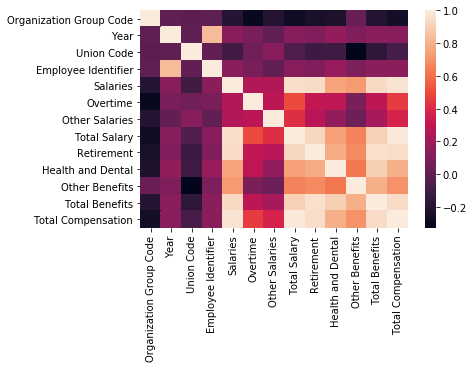

In [8]:
#heatmap
sns.heatmap(df.corr())

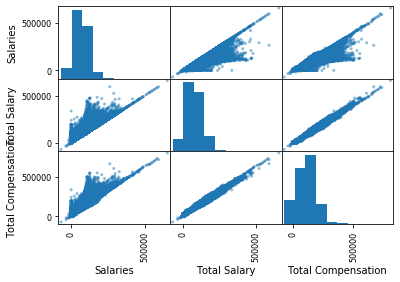

In [9]:
salaries_sm = scatter_matrix(df[['Salaries', 'Total Salary', 'Total Compensation']])

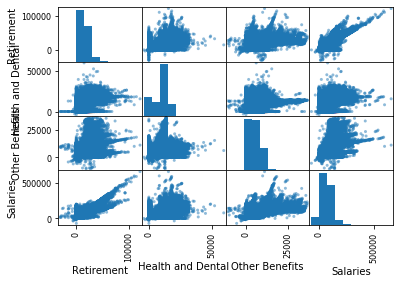

In [10]:

benefits_sm = scatter_matrix(df[['Retirement', 'Health and Dental', 'Other Benefits', 'Salaries']])

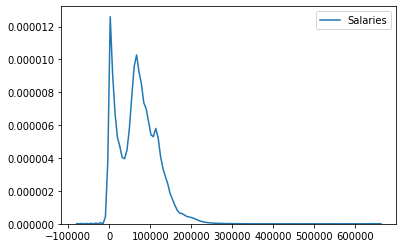

In [11]:
#Target
ax = sns.kdeplot(df['Salaries'])
ax#.set_xlim(20000,50000)

In [12]:
df['Salaries'].describe()

count    683277.000000
mean      69466.271313
std       47771.799981
min      -68771.780000
25%       29009.540000
50%       67899.360000
75%      100416.890000
max      651936.710000
Name: Salaries, dtype: float64

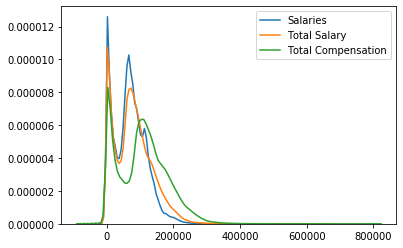

In [13]:
salary = ['Salaries', 'Total Salary', 'Total Compensation']

for col in salary:
    ax_salary = sns.kdeplot(df[col])
    ax_salary#.set_xlim(-25000,75000)

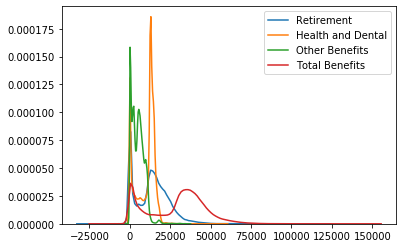

In [14]:
benefits = ['Retirement', 'Health and Dental', 'Other Benefits', 'Total Benefits'] 

for col in benefits:
    ax_benefits = sns.kdeplot(df[col])
    ax_benefits#.set_xlim(-25000,75000)

In [15]:
#sample the data
# Removing Salaries lower than $35000 
df[df['Salaries'] < 35000].count()

Organization Group Code    187216
Job Family Code            187216
Job Code                   187216
Year Type                  187216
Year                       187216
Organization Group         187216
Department Code            187216
Department                 187216
Union Code                 186907
Union                      186907
Job Family                 187216
Job                        187213
Employee Identifier        187216
Salaries                   187216
Overtime                   187216
Other Salaries             187216
Total Salary               187216
Retirement                 187216
Health and Dental          187216
Other Benefits             187216
Total Benefits             187216
Total Compensation         187216
dtype: int64

In [16]:
df2 = df[df['Salaries'] > 35000]

In [17]:
# What and how many organizations we are losing by reducing the data to salaries < 35,000$
org_x = df[df.Salaries<35000]['Organization Group'].value_counts()
org_y = df['Organization Group'].value_counts()
org_z = pd.concat([org_x, (org_x/org_y)], axis=1, join='inner', sort=False)
org_z.columns = ['Organization Count', 'Organization %']
org_z


,Organization Count,Organization %
"Public Works, Transportation & Commerce",48523,0.224883
Community Health,39794,0.265078
Culture & Recreation,36591,0.589056
Human Welfare & Neighborhood Development,24823,0.402461
General Administration & Finance,18569,0.298907
Public Protection,18452,0.140874
General City Responsibilities,464,0.958678


In [18]:
# What and how many departments we are losing by reducing the data to salaries < 35,000$
dep_x = df[df.Salaries<35000].Department.value_counts()
dep_y = df.Department.value_counts()
dep_z = pd.concat([dep_x, (dep_x/dep_y)], axis=1, join='inner', sort=False)
dep_z.columns = ['Department Count', 'Department %']
dep_z.head(10)

,Department Count,Department %
DPH Public Health,24388,0.294296
Public Health,15406,0.229075
REC Recreation & Park Commsn,15106,0.701365
HSA Human Services Agency,14569,0.465612
MTA Municipal Transprtn Agncy,13449,0.240780
Recreation And Park Commission,11526,0.669844
Municipal Transportation Agcy,9214,0.200174
Human Services,7982,0.348940
POL Police,4773,0.157832
DPW GSA - Public Works,4598,0.312343


In [19]:
# What and how many jobs we are losing by reducing the data to salaries < 35,000$
job_x = df[df.Salaries<35000].Job.value_counts()
job_y = df.Job.value_counts()
job_z = pd.concat([job_x, (job_x/job_y)], axis=1, join='inner', sort=False)
job_z.columns = ['Job Count', 'Job %']
job_z.head(10)


,Job Count,Job %
Special Nurse,15962,0.631283
Public Service Trainee,13148,0.960409
Recreation Leader,11525,0.995508
Public Svc Aide-Public Works,10920,0.996714
Transit Operator,9944,0.229267
Library Page,3951,0.894701
Junior Clerk,3489,0.910016
School Crossing Guard,3413,1.000000
Custodian,2998,0.221664
Clerk,2475,0.475322


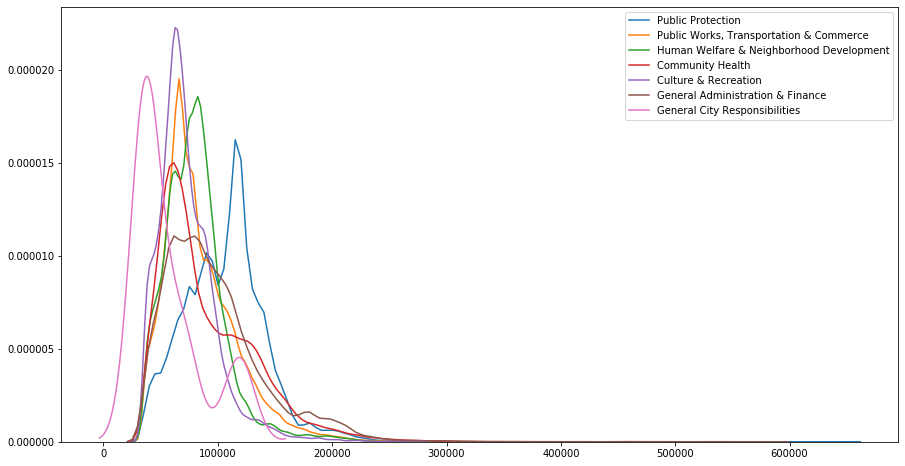

In [20]:
#Distribution of salaries by organization
plt.figure(figsize=(15,8))
for col in list(df2['Organization Group'].unique()):
    ax = sns.kdeplot(df2['Salaries'][df2['Organization Group'] == col], label = col)

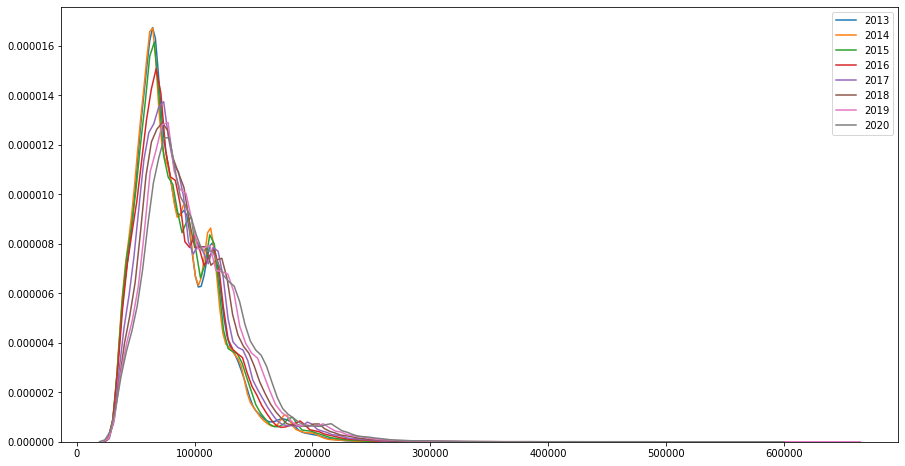

In [21]:
#Distribution of salries by years
plt.figure(figsize=(15,8))
for col in list(df2['Year'].unique()):
    sns.kdeplot(df2['Salaries'][df2['Year'] == col], label = col)

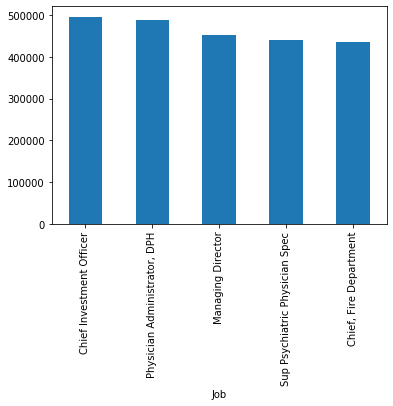

In [22]:
#Most compensating jobs
df_groupby_Job = df.groupby('Job').mean()
df_groupby_Job['Total Compensation'].sort_values(ascending = False).head(5).plot(kind='bar')

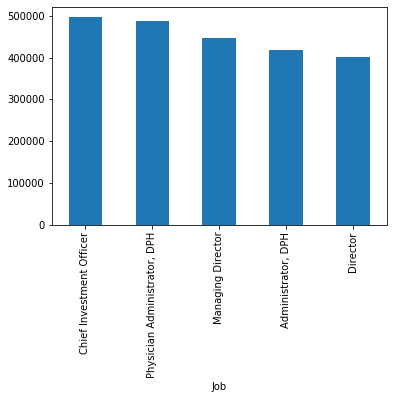

In [23]:
df_groupby_Job['Total Compensation No Extras'] = df_groupby_Job['Total Compensation'] - df_groupby_Job['Overtime'] - df_groupby_Job['Other Salaries']
df_groupby_Job['Total Compensation No Extras'].sort_values(ascending = False).head(5).plot(kind='bar')


In [24]:
#preprocessing
df2['Overtime Amount'] = pd.Series(df2.Overtime / df2.Salaries)


df2['Overtime Amount'] = pd.cut(df2['Overtime Amount'], 5, labels = ['few overtime', 'less than average overtime', 'average overtime',
                                                                     'more than average overtime', 'many overtime'])
#df2['Overtime Amount']

C:\Users\cinta\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\cinta\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [25]:
df2['Retirement Amount'] = pd.Series(df2.Retirement / df2.Salaries)


df2['Retirement Amount'] = pd.cut(df2['Retirement Amount'], 5, labels = ['few retirement', 'less than average retirement', 'average retirement',
                                                                     'more than average retirement', 'many retirement'])
#df2['Retirement Amount']

C:\Users\cinta\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\cinta\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [26]:
df2['Health and Dental Amount'] = pd.Series(df2['Health and Dental'] / df2.Salaries)


df2['Health and Dental Amount'] = pd.cut(df2['Health and Dental Amount'], 5, labels = ['few Health and Dental', 'less than average Health/Dental', 
                                                                               'average Health and Dental', 'more than average Health/Dental', 
                                                                               'many Health and Dental'])
#df2['Health/Dental Amount']

C:\Users\cinta\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\cinta\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [27]:
df2['Other Benefits Amount'] = pd.Series(df2['Other Benefits'] / df2.Salaries)


df2['Other Benefits Amount'] = pd.cut(df2['Other Benefits Amount'], 5, labels = ['few Other Benefits', 'less than average Other Benefits', 
                                                                                 'average Other Benefits', 'more than average Other Benefits', 
                                                                                 'many Other Benefits'])
#df2['Other Benefits Amount']


C:\Users\cinta\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\cinta\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [28]:
df2.head()

,Organization Group Code,Job Family Code,Job Code,Year Type,Year,Organization Group,Department Code,Department,Union Code,Union,...,Total Salary,Retirement,Health and Dental,Other Benefits,Total Benefits,Total Compensation,Overtime Amount,Retirement Amount,Health and Dental Amount,Other Benefits Amount
0,1,1000,1021,Calendar,2013,Public Protection,ADP,ADP Adult Probation,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",...,57534.65,11253.16,11961.34,4532.63,27747.13,85281.78,few overtime,average retirement,less than average Health/Dental,less than average Other Benefits
1,1,1000,1023,Calendar,2013,Public Protection,ADP,ADP Adult Probation,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",...,57678.50,10284.88,7176.80,4755.14,22216.82,79895.32,few overtime,average retirement,few Health and Dental,less than average Other Benefits
2,1,1000,1031,Calendar,2013,Public Protection,ADP,ADP Adult Probation,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",...,63532.93,12495.83,12918.24,4702.71,30116.78,93649.71,few overtime,average retirement,less than average Health/Dental,less than average Other Benefits
3,1,1000,1054,Calendar,2013,Public Protection,ADP,ADP Adult Probation,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",...,94215.92,19644.45,12918.24,7458.76,40021.45,134237.37,few overtime,average retirement,few Health and Dental,less than average Other Benefits
6,1,1000,1070,Calendar,2013,Public Protection,ADP,ADP Adult Probation,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",...,139889.00,26799.23,12918.24,9791.54,49509.01,189398.01,few overtime,average retirement,few Health and Dental,less than average Other Benefits


In [29]:
#split features and targets from data
X = df2.drop(['Year Type', 'Organization Group', 'Department', 'Union', 'Job Family', 'Job', 'Employee Identifier', 'Salaries', 'Overtime', 
              'Other Salaries', 'Total Salary', 'Retirement', 'Health and Dental', 'Other Benefits', 'Total Benefits', 'Total Compensation'
             ], axis = 1)
y = df2.Salaries
print(X.shape,
      y.shape)

(496060, 10) (496060,)


In [30]:
X.head()

,Organization Group Code,Job Family Code,Job Code,Year,Department Code,Union Code,Overtime Amount,Retirement Amount,Health and Dental Amount,Other Benefits Amount
0,1,1000,1021,2013,ADP,21.0,few overtime,average retirement,less than average Health/Dental,less than average Other Benefits
1,1,1000,1023,2013,ADP,21.0,few overtime,average retirement,few Health and Dental,less than average Other Benefits
2,1,1000,1031,2013,ADP,21.0,few overtime,average retirement,less than average Health/Dental,less than average Other Benefits
3,1,1000,1054,2013,ADP,21.0,few overtime,average retirement,few Health and Dental,less than average Other Benefits
6,1,1000,1070,2013,ADP,21.0,few overtime,average retirement,few Health and Dental,less than average Other Benefits


In [31]:
#Training/predicting pipeline
def get_Job_Family_Code(df):
    return df[['Job Family Code']]

FullTransformerJobFamilyCode  = Pipeline([("Select_Columns",  FunctionTransformer(func=get_Job_Family_Code, validate=False)),
                                          ("Fill_Null", SimpleImputer(missing_values=np.nan, strategy='constant', fill_value='No Value')),
                                          ("One_Hot_Encoder", OneHotEncoder(sparse = False, handle_unknown='ignore'))
                                         ])

In [32]:
#Set a pipeline for filling the nulls
def get_features_Union_Code(df):
    return df[['Union Code']]

FullTransformerUnionCode  = Pipeline([("Select_Columns",  FunctionTransformer(func=get_features_Union_Code, validate=False)),
                                      ("Fill_Null", SimpleImputer(missing_values=np.nan, strategy='constant', fill_value=0)),
                                      ("One_Hot_Encoder", OneHotEncoder(sparse = False, handle_unknown='ignore'))
                                     ])

In [33]:
#Set a pipeline for one hot encoding
def get_features_onehot(df):
    return df.drop(['Union Code', 'Job Family Code'], axis=1)

FullTransformerOneHotEncoding  = Pipeline([("Select_Columns",  FunctionTransformer(func=get_features_onehot, validate=False)),
                                           ("One_Hot_Encoder", OneHotEncoder(sparse = False, handle_unknown='ignore'))])


In [34]:
FeatureUnionTransformer = FeatureUnion([("FTJobFamilyCode",  FullTransformerJobFamilyCode),
                                        ("FTUnionCode",      FullTransformerUnionCode),
                                        ("FTOneHotEncoding", FullTransformerOneHotEncoding)
                                       ])


In [48]:
#Prediction & submission
X_train, X_test, y_train, y_test = split(X, y)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(372045, 10) (372045,)
(124015, 10) (124015,)


In [56]:
#Clustering
gmm = GaussianMixture(n_components=4)


In [57]:
clust = np.array(df[['Retirement', 'Health and Dental']])

In [58]:
clust.shape

(683277, 2)

In [59]:
gmm.fit(clust)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=4, n_init=1, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

In [60]:
gmm.means_
gmm.covariances_

array([[[1.42258094e+08, 3.80690255e+07],
        [3.80690255e+07, 2.97902895e+07]],

       [[1.00000000e-06, 5.98401356e-18],
        [5.98401356e-18, 4.53663598e+06]],

       [[2.54415611e+07, 1.72125630e+06],
        [1.72125630e+06, 1.87939137e+06]],

       [[2.07516258e+07, 2.05239843e+07],
        [2.05239843e+07, 2.24782547e+07]]])

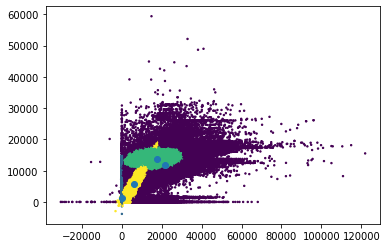

In [61]:
plt.scatter(clust[:,0], clust[:,1], s=2, c= gmm.predict(clust))
plt.scatter(gmm.means_[:, 0], gmm.means_[:,1])
plt.show()


In [62]:
gmm = GaussianMixture(n_components=8)

In [63]:
gmm.fit(clust)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=8, n_init=1, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

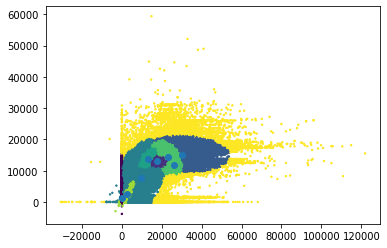

In [64]:
plt.scatter(clust[:,0], clust[:,1], s=2, c= gmm.predict(clust))
plt.scatter(gmm.means_[:, 0], gmm.means_[:,1])
plt.show()


In [67]:
clust_compensation = np.array(df[['Overtime', 'Other Salaries', 'Retirement', 'Health and Dental', 'Other Benefits']])

In [68]:
gmm = GaussianMixture(n_components=4)

In [69]:
clust_compensation_minmax = MinMaxScaler().fit_transform(clust_compensation)

In [70]:
gmm.fit(clust_compensation_minmax)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=4, n_init=1, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

In [71]:
df['Clust Compensation'] = gmm.predict(clust_compensation_minmax)

In [72]:
df = pd.get_dummies(df, columns=['Clust Compensation'])

In [73]:
df.head()

,Organization Group Code,Job Family Code,Job Code,Year Type,Year,Organization Group,Department Code,Department,Union Code,Union,...,Total Salary,Retirement,Health and Dental,Other Benefits,Total Benefits,Total Compensation,Clust Compensation_0,Clust Compensation_1,Clust Compensation_2,Clust Compensation_3
0,1,1000,1021,Calendar,2013,Public Protection,ADP,ADP Adult Probation,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",...,57534.65,11253.16,11961.34,4532.63,27747.13,85281.78,0,0,1,0
1,1,1000,1023,Calendar,2013,Public Protection,ADP,ADP Adult Probation,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",...,57678.50,10284.88,7176.80,4755.14,22216.82,79895.32,0,0,1,0
2,1,1000,1031,Calendar,2013,Public Protection,ADP,ADP Adult Probation,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",...,63532.93,12495.83,12918.24,4702.71,30116.78,93649.71,0,0,1,0
3,1,1000,1054,Calendar,2013,Public Protection,ADP,ADP Adult Probation,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",...,94215.92,19644.45,12918.24,7458.76,40021.45,134237.37,0,1,0,0
4,1,1000,1062,Calendar,2013,Public Protection,ADP,ADP Adult Probation,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",...,5084.00,1083.90,956.91,387.50,2428.31,7512.31,0,0,1,0
